### <p style="text-align: right;"> &#9989; Put your name here.</p>

# PHY480 Day 7

## In-class activity: Ordinary differential equations (ODE)

In this in-class assignment we explore the simplest numerical scheme for solving first-order ordinary differential equations

$$
\frac{dy}{dx}=f(x,y).
$$

The iterative process propagates the numerical solution from the initial condition $y(x_0)=y_0$ as

$$
y_{i+1}=y_i+hf(x,y_i).
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# integrate dy/dx = f(x,y) with a forward Euler scheme,
# y may be a vector
# Input:
# rhs -- the right-hand-side function f(x,y)
# y0 -- the initial value y(x0)=y0, it must be a NumPy array or a list
#       (even in the scalar case it must be defined as array or list with one element)
# x0 -- initial integration point on x
# xf -- final integration point on x (i.e. we are finding y(x) in [x0,xf] range)
# h -- step size for the Euler method
# args -- additional arguments (e.g. parameters) for f(x,y)
# Output:
# status -- =0 on success
# y -- the last point y(xf)
# xlist -- list of all x points during the integration
# ylist -- y(x) at the x points above
def integrate_ode_euler( rhs, y0, x0, xf, h, args=None ):
    
    # number of steps, may need one more if xf-x0 is not
    # an integer multiple of h
    n = int( ( xf - x0 ) / h )
    
    # initialization
    y = y0.copy()
    xlist = [ x0 ]
    ylist = [ y0.copy() ]
    h2 = h # step size may be different for the last step

    # loop (one step more)
    for i in range(n+1):

        # check on the last step
        if i==n:
            if np.abs( xf - x ) > h*1e-7: # we need an extra last step which is less than h
                h2 = xf - x
                x = xf
            else: # done -- the last point is exactly on the boundary xf
                break
        else: # normal iteration
            x = x0 + h*(i + 1)

        # handle functions with and without arguments
        if args==None:
            f = rhs( x, y )
        else:
            f = rhs( x, y, args )

        # forward Euler update
        y += f * h2

        # store y(x) at the evaluated points
        xlist.append( x )
        ylist.append( y.copy() )

    # normal return
    status = 0
    return status, y, xlist, ylist


A simple test function $y(x)=y_0\exp(\mu x)$ for studying the stability and global error of the method.

In [3]:
# exponential test function
def rhs_exp( x, y, mu=1 ):
    
    return mu*y

# test parameters
x0 = 0
xf = 2
y0 = np.array( [ 1. ] )
mu = -4


In [4]:
# analytic result for plotting
xth = np.linspace( x0, xf, num=401, endpoint=True )
yth = np.exp( mu*xth )


Solve and plot the solutions in the range $[0,2]$ for different step sizes.

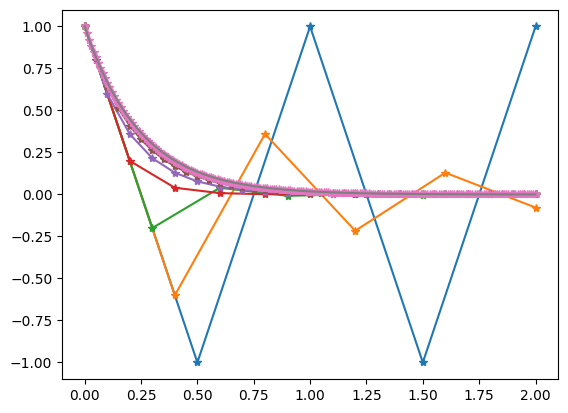

In [5]:
# solve for different step sizes
hlist = [ 0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01 ]

# plot
for h in hlist:
    status, y, xlist, ylist = integrate_ode_euler( rhs_exp, y0, x0, xf, h, args=(mu) )
    plt.plot( xlist, ylist, "*-" )

# analytic result
plt.plot( xth, yth )


Study the scaling of the distance between the numerical and exact result as function of the step size.

In [6]:
# look at the error on the last point as function of step size
hlist = [1/2**(i+3) for i in range(12) ]
errlist = []
yexact = y0*np.exp( mu*xf )

for h in hlist:
    status, y, xlist, ylist = integrate_ode_euler( rhs_exp, y0, x0, xf, h, args=(mu) )
    errlist.append( np.linalg.norm( y - yexact ) )


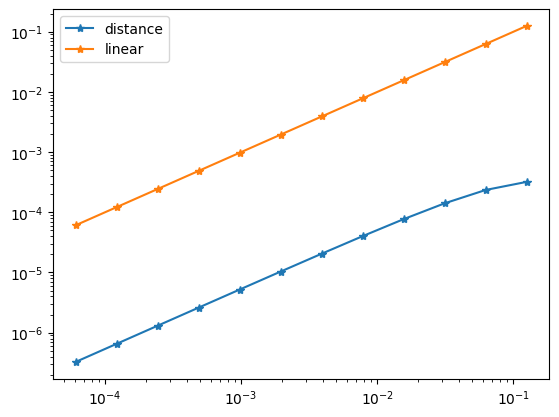

In [7]:
# plot on log-log scale
plt.loglog( hlist, errlist, "*-", label="distance" )
plt.loglog( hlist, hlist, "*-", label="linear" )
plt.legend()


&#169; Copyright 2025,  Michigan State University Board of Trustees